In [ ]:
import os
from PIL import Image

def get_image_resolutions(folder_path, excluded_folders=[]):
    image_sizes = []
    
    for root, dirs, files in os.walk(folder_path, topdown=True):
        # Exclude specified directories
        dirs[:] = [d for d in dirs if d not in excluded_folders]
        
        for file in files:
            file_path = os.path.join(root, file)
            
            try:
                with Image.open(file_path) as img:
                    image_sizes.append(img.size)  # (width, height)
            except (IOError, OSError):
                pass  # Ignore non-image files
    
    return image_sizes

folder_path = "datasets"
excluded_folders = ["elmadafri_the-wildfire-dataset"]

image_sizes = get_image_resolutions(folder_path, excluded_folders)

In [2]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_image_sizes(image_sizes):
    widths, heights = zip(*image_sizes)
    plt.figure(figsize=(10, 6))
    plt.scatter(widths, heights, alpha=0.2, color='red', edgecolor='black')
    plt.title("Image Sizes Distribution")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Height (pixels)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def plot_image_sizes_hex(image_sizes):
    size_counts = Counter(image_sizes).most_common(5)
    print("Top 5 Most Common Image Sizes:")
    for size, count in size_counts:
        print(f"{size}: {count}")
    
    widths, heights = zip(*image_sizes)
    plt.figure(figsize=(10, 6))
    plt.hexbin(widths, heights, gridsize=30, cmap='Reds', mincnt=1)
    plt.colorbar(label="Count")
    plt.title("Image Sizes Distribution")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Height (pixels)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


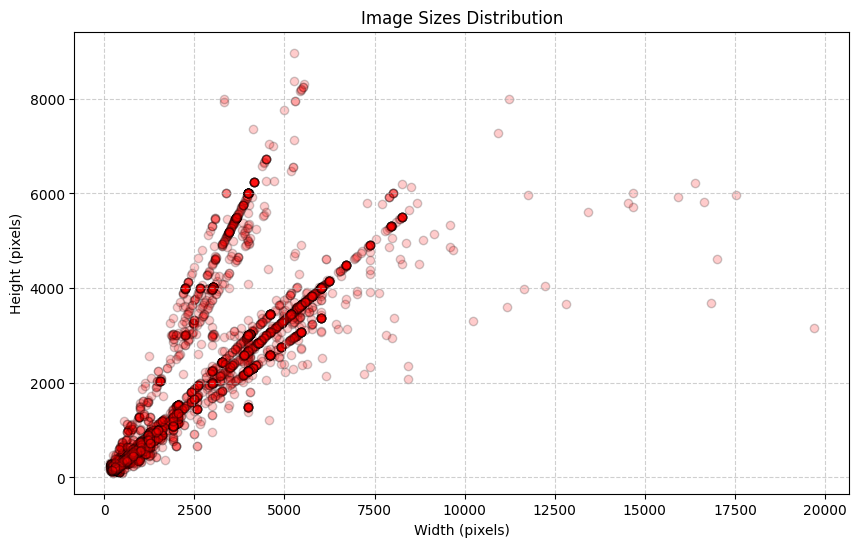

In [4]:
plot_image_sizes(image_sizes)

Top 5 Most Common Image Sizes:
(250, 250): 3734
(275, 183): 410
(300, 168): 332
(259, 194): 235
(1920, 1080): 217


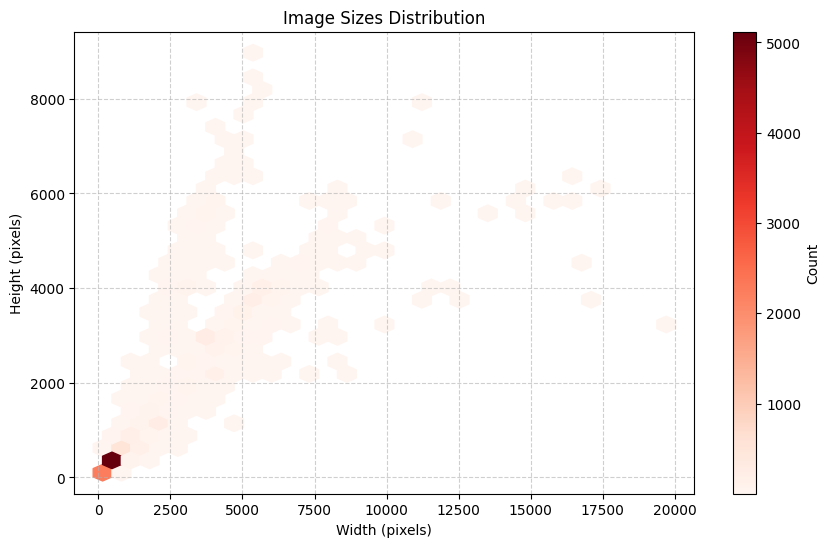

In [5]:
plot_image_sizes_hex(image_sizes)